In [1]:
import torch.nn as nn
import torch
from torchvision import models
from datasets.linemod.dataset import DepthDataset
import torch
import os
import torch.nn.functional as F
from lib.loss_depth import L2Loss, GradientLoss, NormalLoss, BerHu
from torch import optim
import numpy as np
import time
import matplotlib.pyplot as plt
from lib.utils import setup_logger, im_convert, depth_to_img
from lib.network import DepthV3
from lib.utils import visualize

%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore") 

In [2]:
dataset_root = "./datasets/linemod/Linemod_preprocessed"
log_dir = 'experiments/logs/depth_prediction'
outf = 'trained_models/depth_prediction'

dataset = DepthDataset('train', dataset_root)
dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=2, 
                                         shuffle=True, 
                                         num_workers=1)

test_dataset = DepthDataset('test', dataset_root)
testdataloader = torch.utils.data.DataLoader(test_dataset, 
                                             batch_size=1, 
                                             shuffle=True, 
                                             num_workers=1)

Object 6 buffer loaded
Object 8 buffer loaded
Object 9 buffer loaded
Object 12 buffer loaded
Object 13 buffer loaded
Object 14 buffer loaded
Object 15 buffer loaded
Object 6 buffer loaded
Object 8 buffer loaded
Object 9 buffer loaded
Object 12 buffer loaded
Object 13 buffer loaded
Object 14 buffer loaded
Object 15 buffer loaded


In [3]:
# model = 'trained_models/depth_prediction/pose_model_1_197.19965664101713.pth'
estimator = DepthV3((480, 640))
# estimator.load_state_dict(torch.load(model))
estimator.cuda()
lr = 0.001
optimizer = optim.Adam(estimator.parameters(), lr=lr)
# optimizer = optim.SGD(estimator.parameters(), lr, momentum=0.9, weight_decay=1e-4)
batch_size = 16
print_every = 32

lossLogL2 = L2Loss()
lossGrad = GradientLoss()
lossNormal = NormalLoss()
berhu = BerHu()


In [4]:
# lr *= 0.1
# optimizer = optim.Adam(estimator.parameters(), lr=lr)

In [5]:
len(dataloader)

637

Train time 00h 00m 00s, Training started
Train time 00h 00m 49s Epoch 1 Batch 2 Frame 32
Avg_loss: 1390.779877 loss_l2: 1129.593842 loss_grad: 257.169621 loss_normal: 4.016416
Train time 00h 01m 37s Epoch 1 Batch 4 Frame 64
Avg_loss: 1359.534023 loss_l2: 1116.097652 loss_grad: 239.734179 loss_normal: 3.702175
Train time 00h 02m 26s Epoch 1 Batch 6 Frame 96
Avg_loss: 1403.352211 loss_l2: 1175.389034 loss_grad: 224.430145 loss_normal: 3.533049
Train time 00h 03m 15s Epoch 1 Batch 8 Frame 128
Avg_loss: 1464.134216 loss_l2: 1219.949429 loss_grad: 240.714177 loss_normal: 3.470607
Train time 00h 04m 04s Epoch 1 Batch 10 Frame 160
Avg_loss: 1347.613243 loss_l2: 1112.416637 loss_grad: 231.939354 loss_normal: 3.257236
Train time 00h 04m 53s Epoch 1 Batch 12 Frame 192
Avg_loss: 1231.076916 loss_l2: 1018.210865 loss_grad: 209.650290 loss_normal: 3.215758
Train time 00h 05m 42s Epoch 1 Batch 14 Frame 224
Avg_loss: 1394.180077 loss_l2: 1116.634495 loss_grad: 274.429226 loss_normal: 3.116361
Train t

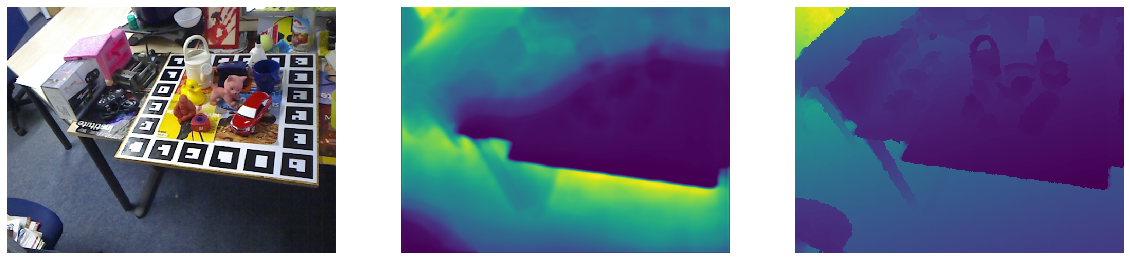

Test time 00h 18m 08s Epoch 1 TEST FINISH Avg loss: 1426.5203865093893 Train avg loss: 1347.915664073998
1 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 00h 18m 08s, Training started
Train time 00h 18m 57s Epoch 2 Batch 2 Frame 32
Avg_loss: 1258.919167 loss_l2: 1024.750763 loss_grad: 231.114101 loss_normal: 3.054302
Train time 00h 19m 46s Epoch 2 Batch 4 Frame 64
Avg_loss: 1226.319752 loss_l2: 985.163712 loss_grad: 238.223681 loss_normal: 2.932364
Train time 00h 20m 35s Epoch 2 Batch 6 Frame 96
Avg_loss: 1349.279713 loss_l2: 1060.439972 loss_grad: 285.853131 loss_normal: 2.986608
Train time 00h 21m 24s Epoch 2 Batch 8 Frame 128
Avg_loss: 1343.025696 loss_l2: 1097.875607 loss_grad: 242.216442 loss_normal: 2.933651
Train time 00h 22m 13s Epoch 2 Batch 10 Frame 160
Avg_loss: 1100.612270 loss_l2: 909.325527 loss_grad: 188.476486 loss_normal: 2.810263
Train time 00h 23m 01s Epoch 2 Batch 12 Frame 192
Avg_loss: 1233.098072 loss_l2: 993.316093 loss_grad: 236.760153 loss_

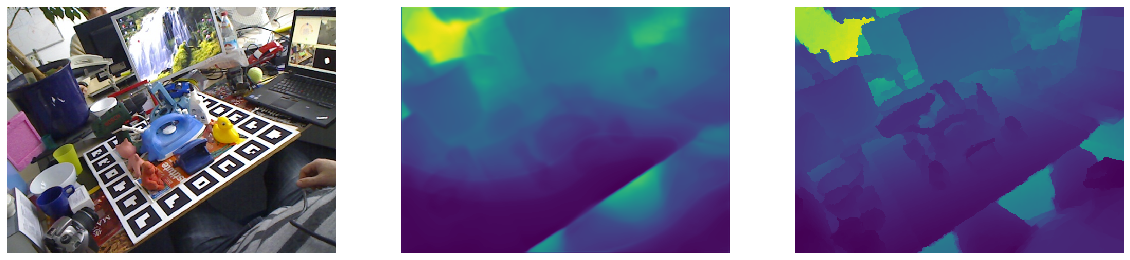

Test time 00h 36m 16s Epoch 2 TEST FINISH Avg loss: 1298.08687817451 Train avg loss: 1228.3985912855978
2 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 00h 36m 17s, Training started
Train time 00h 37m 06s Epoch 3 Batch 2 Frame 32
Avg_loss: 1214.246017 loss_l2: 928.038431 loss_grad: 283.447142 loss_normal: 2.760468
Train time 00h 37m 55s Epoch 3 Batch 4 Frame 64
Avg_loss: 1209.126060 loss_l2: 953.688473 loss_grad: 252.575676 loss_normal: 2.861898
Train time 00h 38m 44s Epoch 3 Batch 6 Frame 96
Avg_loss: 1090.147568 loss_l2: 885.804302 loss_grad: 201.539611 loss_normal: 2.803663
Train time 00h 39m 33s Epoch 3 Batch 8 Frame 128
Avg_loss: 1077.527187 loss_l2: 825.229958 loss_grad: 249.438091 loss_normal: 2.859140
Train time 00h 40m 22s Epoch 3 Batch 10 Frame 160
Avg_loss: 1295.033737 loss_l2: 984.635220 loss_grad: 307.530397 loss_normal: 2.868107
Train time 00h 41m 11s Epoch 3 Batch 12 Frame 192
Avg_loss: 1103.818592 loss_l2: 867.688896 loss_grad: 233.214920 loss_norm

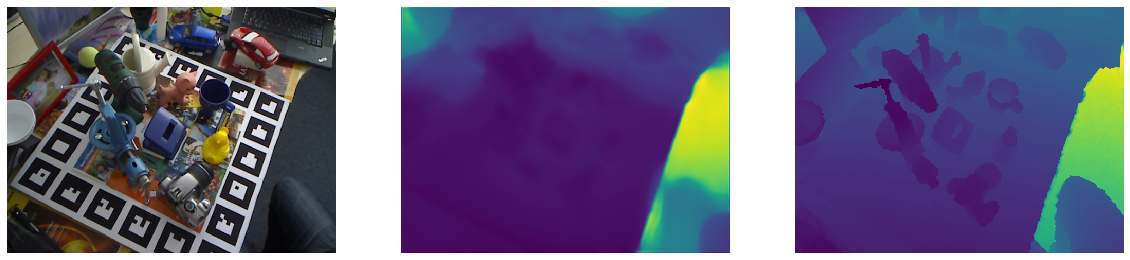

Test time 00h 54m 28s Epoch 3 TEST FINISH Avg loss: 1173.663010496001 Train avg loss: 1111.5399648046568
3 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 00h 54m 28s, Training started
Train time 00h 55m 17s Epoch 4 Batch 2 Frame 32
Avg_loss: 1071.247726 loss_l2: 823.379992 loss_grad: 245.073312 loss_normal: 2.794415
Train time 00h 56m 06s Epoch 4 Batch 4 Frame 64
Avg_loss: 1124.845985 loss_l2: 861.616478 loss_grad: 260.363280 loss_normal: 2.866215
Train time 00h 56m 55s Epoch 4 Batch 6 Frame 96
Avg_loss: 960.102989 loss_l2: 731.011351 loss_grad: 226.289480 loss_normal: 2.802152
Train time 00h 57m 44s Epoch 4 Batch 8 Frame 128
Avg_loss: 949.528221 loss_l2: 703.787239 loss_grad: 242.918635 loss_normal: 2.822339
Train time 00h 58m 33s Epoch 4 Batch 10 Frame 160
Avg_loss: 1033.336460 loss_l2: 778.710659 loss_grad: 251.741879 loss_normal: 2.883937
Train time 00h 59m 22s Epoch 4 Batch 12 Frame 192
Avg_loss: 1105.669685 loss_l2: 814.394323 loss_grad: 288.553431 loss_norma

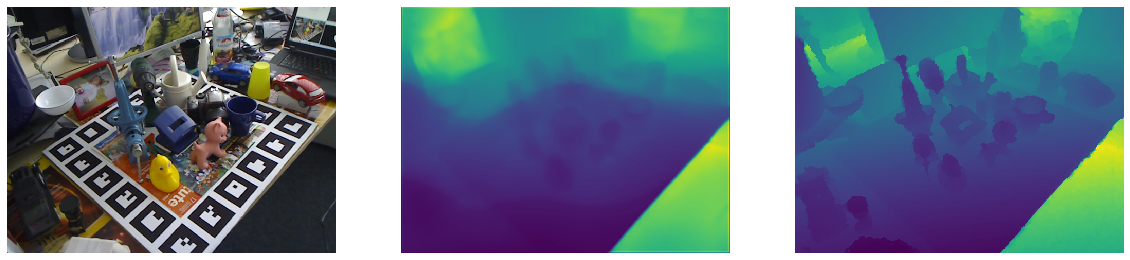

Test time 01h 12m 38s Epoch 4 TEST FINISH Avg loss: 944.457982580089 Train avg loss: 972.5340201049996
4 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 01h 12m 38s, Training started
Train time 01h 13m 28s Epoch 5 Batch 2 Frame 32
Avg_loss: 860.598358 loss_l2: 618.469893 loss_grad: 239.311090 loss_normal: 2.817370
Train time 01h 14m 16s Epoch 5 Batch 4 Frame 64
Avg_loss: 867.053442 loss_l2: 621.273218 loss_grad: 242.990817 loss_normal: 2.789394
Train time 01h 15m 05s Epoch 5 Batch 6 Frame 96
Avg_loss: 918.168995 loss_l2: 666.342344 loss_grad: 248.880586 loss_normal: 2.946052
Train time 01h 15m 54s Epoch 5 Batch 8 Frame 128
Avg_loss: 972.273605 loss_l2: 694.226988 loss_grad: 275.113462 loss_normal: 2.933154
Train time 01h 16m 43s Epoch 5 Batch 10 Frame 160
Avg_loss: 970.853191 loss_l2: 696.165312 loss_grad: 271.886860 loss_normal: 2.801007
Train time 01h 17m 32s Epoch 5 Batch 12 Frame 192
Avg_loss: 845.558620 loss_l2: 614.122427 loss_grad: 228.766932 loss_normal: 2.6

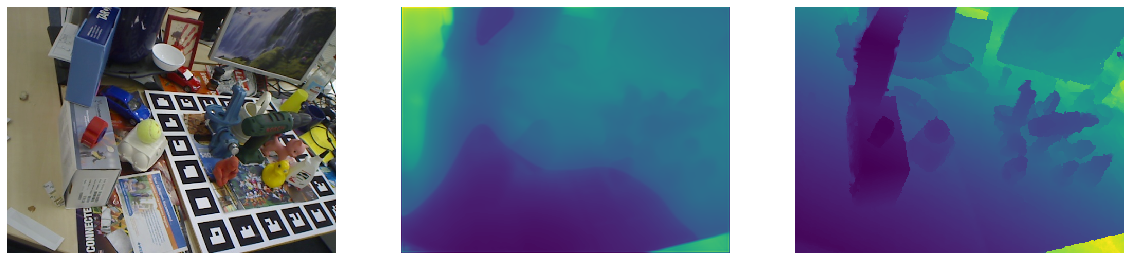

Test time 01h 30m 50s Epoch 5 TEST FINISH Avg loss: 771.8130755291305 Train avg loss: 832.8272403255924
5 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 01h 30m 50s, Training started
Train time 01h 31m 39s Epoch 6 Batch 2 Frame 32
Avg_loss: 787.175049 loss_l2: 534.450979 loss_grad: 249.843356 loss_normal: 2.880720
Train time 01h 32m 28s Epoch 6 Batch 4 Frame 64
Avg_loss: 705.955420 loss_l2: 469.749435 loss_grad: 233.390305 loss_normal: 2.815686
Train time 01h 33m 17s Epoch 6 Batch 6 Frame 96
Avg_loss: 763.632313 loss_l2: 509.164339 loss_grad: 251.702443 loss_normal: 2.765532
Train time 01h 34m 06s Epoch 6 Batch 8 Frame 128
Avg_loss: 765.152111 loss_l2: 499.226105 loss_grad: 263.169668 loss_normal: 2.756333
Train time 01h 34m 55s Epoch 6 Batch 10 Frame 160
Avg_loss: 816.915611 loss_l2: 555.354649 loss_grad: 258.680214 loss_normal: 2.880750
Train time 01h 35m 44s Epoch 6 Batch 12 Frame 192
Avg_loss: 773.735287 loss_l2: 514.866098 loss_grad: 256.081696 loss_normal: 2.

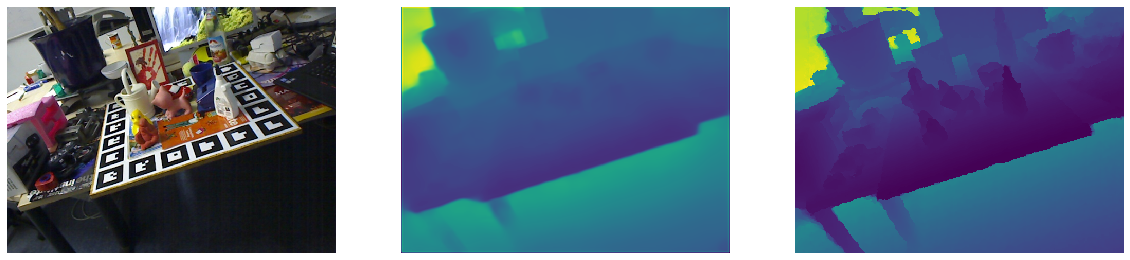

Test time 01h 49m 00s Epoch 6 TEST FINISH Avg loss: 585.4245759335311 Train avg loss: 701.4743971892017
6 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 01h 49m 01s, Training started
Train time 01h 49m 50s Epoch 7 Batch 2 Frame 32
Avg_loss: 580.741574 loss_l2: 358.454323 loss_grad: 219.479254 loss_normal: 2.807998
Train time 01h 50m 39s Epoch 7 Batch 4 Frame 64
Avg_loss: 575.030853 loss_l2: 352.585913 loss_grad: 219.693359 loss_normal: 2.751577
Train time 01h 51m 28s Epoch 7 Batch 6 Frame 96
Avg_loss: 548.108414 loss_l2: 334.243134 loss_grad: 210.920150 loss_normal: 2.945126
Train time 01h 52m 17s Epoch 7 Batch 8 Frame 128
Avg_loss: 622.120293 loss_l2: 390.799017 loss_grad: 228.533994 loss_normal: 2.787280
Train time 01h 53m 06s Epoch 7 Batch 10 Frame 160
Avg_loss: 690.969494 loss_l2: 422.279060 loss_grad: 265.960004 loss_normal: 2.730428
Train time 01h 53m 55s Epoch 7 Batch 12 Frame 192
Avg_loss: 555.084649 loss_l2: 349.559074 loss_grad: 202.760699 loss_normal: 2.

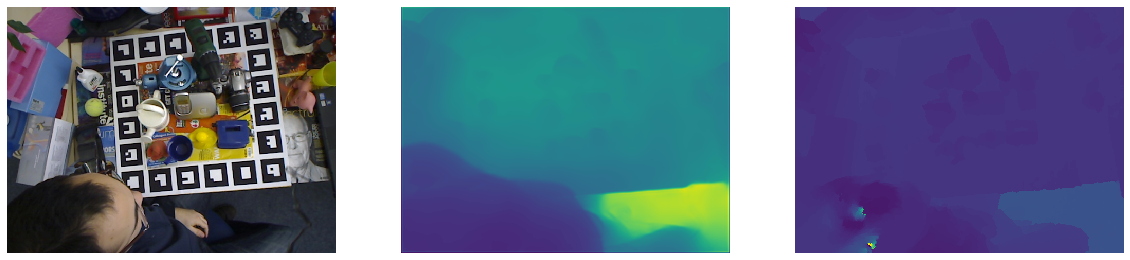

Test time 02h 07m 11s Epoch 7 TEST FINISH Avg loss: 557.2351845682666 Train avg loss: 583.7486922475196
7 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 02h 07m 11s, Training started
Train time 02h 08m 00s Epoch 8 Batch 2 Frame 32
Avg_loss: 492.906029 loss_l2: 262.629383 loss_grad: 227.423711 loss_normal: 2.852933
Train time 02h 08m 49s Epoch 8 Batch 4 Frame 64
Avg_loss: 560.994688 loss_l2: 296.819207 loss_grad: 261.361706 loss_normal: 2.813769
Train time 02h 09m 38s Epoch 8 Batch 6 Frame 96
Avg_loss: 537.943790 loss_l2: 284.878267 loss_grad: 250.316113 loss_normal: 2.749418
Train time 02h 10m 27s Epoch 8 Batch 8 Frame 128
Avg_loss: 537.118563 loss_l2: 291.667150 loss_grad: 242.318130 loss_normal: 3.133285
Train time 02h 11m 16s Epoch 8 Batch 10 Frame 160
Avg_loss: 503.442722 loss_l2: 269.308829 loss_grad: 231.359304 loss_normal: 2.774584
Train time 02h 12m 05s Epoch 8 Batch 12 Frame 192
Avg_loss: 454.172640 loss_l2: 233.237321 loss_grad: 218.051900 loss_normal: 2.

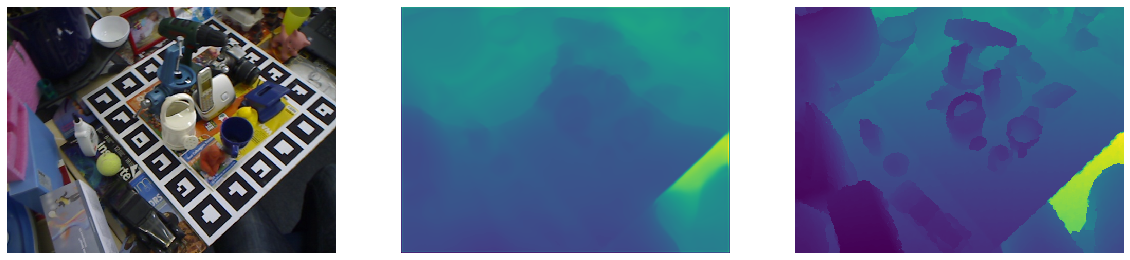

Test time 02h 25m 21s Epoch 8 TEST FINISH Avg loss: 425.3738443598401 Train avg loss: 486.8717353377649
8 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 02h 25m 21s, Training started
Train time 02h 26m 10s Epoch 9 Batch 2 Frame 32
Avg_loss: 453.133934 loss_l2: 210.409934 loss_grad: 239.858933 loss_normal: 2.865070
Train time 02h 26m 59s Epoch 9 Batch 4 Frame 64
Avg_loss: 430.537894 loss_l2: 199.700933 loss_grad: 227.953339 loss_normal: 2.883628
Train time 02h 27m 48s Epoch 9 Batch 6 Frame 96
Avg_loss: 487.445331 loss_l2: 233.636403 loss_grad: 251.039427 loss_normal: 2.769506
Train time 02h 28m 37s Epoch 9 Batch 8 Frame 128
Avg_loss: 426.475486 loss_l2: 193.270038 loss_grad: 230.213939 loss_normal: 2.991508
Train time 02h 29m 26s Epoch 9 Batch 10 Frame 160
Avg_loss: 404.192182 loss_l2: 182.130589 loss_grad: 219.209949 loss_normal: 2.851646
Train time 02h 30m 15s Epoch 9 Batch 12 Frame 192
Avg_loss: 436.988297 loss_l2: 193.496111 loss_grad: 240.522961 loss_normal: 2.

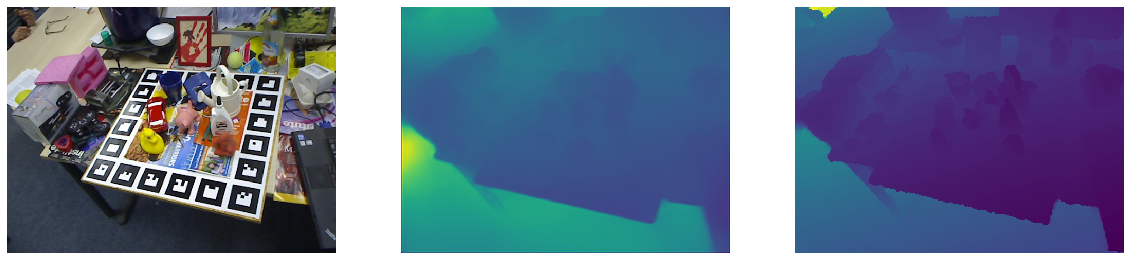

Test time 02h 43m 31s Epoch 9 TEST FINISH Avg loss: 370.5207618415023 Train avg loss: 429.47700838241695
9 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 02h 43m 32s, Training started
Train time 02h 44m 21s Epoch 10 Batch 2 Frame 32
Avg_loss: 307.316938 loss_l2: 110.897795 loss_grad: 193.535934 loss_normal: 2.883211
Train time 02h 45m 10s Epoch 10 Batch 4 Frame 64
Avg_loss: 360.442858 loss_l2: 158.665943 loss_grad: 198.588116 loss_normal: 3.188799
Train time 02h 45m 59s Epoch 10 Batch 6 Frame 96
Avg_loss: 487.899094 loss_l2: 223.588653 loss_grad: 261.183969 loss_normal: 3.126474
Train time 02h 46m 48s Epoch 10 Batch 8 Frame 128
Avg_loss: 441.075726 loss_l2: 187.725321 loss_grad: 250.406899 loss_normal: 2.943507
Train time 02h 47m 37s Epoch 10 Batch 10 Frame 160
Avg_loss: 393.917418 loss_l2: 161.597853 loss_grad: 229.268680 loss_normal: 3.050887
Train time 02h 48m 25s Epoch 10 Batch 12 Frame 192
Avg_loss: 448.151487 loss_l2: 195.596967 loss_grad: 249.473847 loss_nor

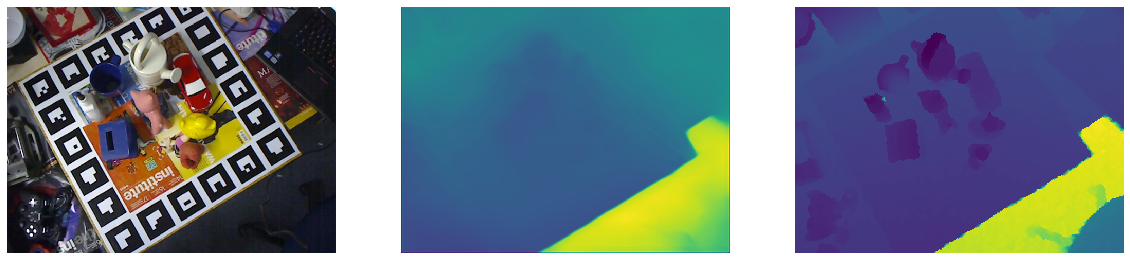

Test time 03h 01m 43s Epoch 10 TEST FINISH Avg loss: 331.89604903066623 Train avg loss: 406.97121183913396
10 >>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<
Train time 03h 01m 43s, Training started
Train time 03h 02m 32s Epoch 11 Batch 2 Frame 32
Avg_loss: 403.849396 loss_l2: 161.042284 loss_grad: 239.672045 loss_normal: 3.135067
Train time 03h 03m 21s Epoch 11 Batch 4 Frame 64
Avg_loss: 460.894311 loss_l2: 171.893555 loss_grad: 285.876743 loss_normal: 3.124012
Train time 03h 04m 10s Epoch 11 Batch 6 Frame 96
Avg_loss: 355.370774 loss_l2: 135.103519 loss_grad: 217.248056 loss_normal: 3.019197


Traceback (most recent call last):
  File "/home/aquancva/.conda/envs/visual/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/aquancva/.conda/envs/visual/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/aquancva/.conda/envs/visual/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/aquancva/.conda/envs/visual/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

In [6]:
start_epoch = 1
nepoch = 20
repeat_epoch = 1
best_test = np.Inf
grad_after = 0
normal_after = 0

if start_epoch == 1:
    for log in os.listdir(log_dir):
        if '.ipyn' not in log:
            os.remove(os.path.join(log_dir, log))
st_time = time.time()


for epoch in range(start_epoch, nepoch):
    mess = 'Train time {0}'.format(time.strftime("%Hh %Mm %Ss", time.gmtime(time.time() - st_time)) + ', ' + 'Training started')
    print(mess)
    
    train_count = 0
    loss_avg = 0.0
    loss_l2_avg = 0.0
    loss_normal_avg = 0.0
    loss_grad_avg = 0.0
    train_loss_avg = 0.0
    estimator.train()
    optimizer.zero_grad()
    

    for i, data in enumerate(dataloader, 0):
        img, depth = data
        depth = depth.unsqueeze(1)
#         max_d = torch.max(depth)
#         min_d = torch.min(depth)
#         depth_norm = (depth - min_d) * 255 / (max_d - min_d)

#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
#         ax1.imshow(im_convert(img))
#         ax1.axis("off")
#         ax2.imshow(depth_to_img(depth_norm), cmap='gray')
#         ax2.axis("off")
#         plt.show()
        
        img, depth = img.float().cuda(), depth.float().cuda()
        pred_depth = estimator(img)

        loss_L2 = berhu(pred_depth, depth) 
        loss_grad = lossGrad(pred_depth, depth) * (epoch > grad_after) * 2
        loss_normal = lossNormal(pred_depth, depth) * (epoch > normal_after) * 5
        total_loss = loss_L2 + loss_normal + loss_grad
        
        total_loss.backward()
        

        loss_avg += total_loss.item()
        loss_l2_avg += loss_L2.item()
        loss_normal_avg += loss_normal.item()
        loss_grad_avg += loss_grad.item()
        train_loss_avg += total_loss.item()
        train_count += 1

        if train_count % batch_size == 0:

            optimizer.step()
            optimizer.zero_grad()
            
 
            if train_count % print_every == 0:
                mess = 'Train time {0} Epoch {1} Batch {2} Frame {3}\nAvg_loss: {4:.6f} loss_l2: {5:.6f} loss_grad: {6:.6f} loss_normal: {7:.6f}'.format(
                            time.strftime("%Hh %Mm %Ss", time.gmtime(time.time() - st_time)), 
                            epoch, int(train_count / batch_size), 
                            train_count, 
                            loss_avg / batch_size, 
                            loss_l2_avg / batch_size, 
                            loss_grad_avg / batch_size, 
                            loss_normal_avg / batch_size)
                print(mess)
                
            loss_avg = 0
            loss_avg = 0.0
            loss_l2_avg = 0.0
            loss_normal_avg = 0.0
            loss_grad_avg = 0.0

        if train_count != 0 and train_count % 500 == 0:                    
            torch.save(estimator.state_dict(), '{0}/pose_model_current.pth'.format(outf))

    print('>>>>>>>>----------epoch {0} train finish---------<<<<<<<<'.format(epoch))
    
    test_loss = 0.0
    test_count = 0
    estimator.eval()
    plot = True
    
    for j, data in enumerate(testdataloader, 0):
        img, depth = data
        depth = depth.unsqueeze(0)
        
        img, depth = img.float().cuda(), depth.float().cuda()
        
        pred_depth = estimator(img)
        
        loss_L2 = berhu(pred_depth, depth) 
        loss_grad = lossGrad(pred_depth, depth) * (epoch > grad_after) * 2
        loss_normal = lossNormal(pred_depth, depth) * (epoch > normal_after) * 5
        total_loss = loss_L2 + loss_normal + loss_grad
        
        test_loss += total_loss.item()
        test_count += 1
        
        if plot:
            visualize(img, depth[0].view(480, 640).cpu().detach(), pred_depth[0].view(480, 640).cpu().detach())
            plt.show()
            plot= False
                
    test_loss = test_loss / test_count
    mess = 'Test time {0} Epoch {1} TEST FINISH Avg loss: {2} Train avg loss: {3}'.format(time.strftime("%Hh %Mm %Ss", time.gmtime(time.time() - st_time)), epoch, test_loss, train_loss_avg/len(dataloader))
    print(mess)
    train_loss_avg = 0.0
    
#     if test_loss <= best_test:
#     best_test = test_loss
    torch.save(estimator.state_dict(), '{0}/pose_model_{1}_{2}.pth'.format(outf, epoch, test_loss))
    print(epoch, '>>>>>>>>----------BEST TEST MODEL SAVED---------<<<<<<<<')
           
#     if epoch % 2 == 0:
#         lr *= 0.5
#         optimizer = optim.Adam(estimator.parameters(), lr=lr)

In [ ]:
pred_depth.shape

In [ ]:
test_iter = iter(testdataloader)

In [ ]:
t = next(test_iter)
img, depth = t
img, depth = img.float().cuda(), depth.float().cuda()

# model = 'trained_models/depth_prediction/pose_model_2_11.682505917948717.pth'
# estimator = estimator = DepthV2((480, 640))
# estimator.load_state_dict(torch.load(model))
# estimator.cuda()
estimator.eval()

pred_depth = estimator(img).cpu().detach().view(480, 640)
depth = depth.cpu().view(480, 640)

visualize(img, depth, pred_depth)

In [ ]:
pred_depth

In [ ]:
depth

In [ ]:
a = depth.cpu().detach().numpy().reshape(-1, 1)
plt.hist(a, bins=50);
b = pred_depth.cpu().detach().numpy().reshape(-1, 1)
plt.hist(b, bins=50);

In [ ]:
def im_grad(img):
    fx = torch.tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]]).view(1, 1, 3, 3).float().cuda()
    fx_conv = nn.Conv2d(1, 1, kernel_size=3, bias=False, padding=1)
    fx_conv.weight = nn.Parameter(fx)

    fy = torch.tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]).view(1, 1, 3, 3).float().cuda()
    fy_conv = nn.Conv2d(1, 1, kernel_size=3, bias=False, padding=1)
    fy_conv.weight = nn.Parameter(fy)

    img_mean = torch.mean(img, 1, True)
    grad_x = fx_conv(img_mean)
    grad_y = fy_conv(img_mean)
    
    return grad_x, grad_y

In [ ]:
depth = depth.view(1, 1, 480, -1).cuda()
pred_depth = pred_depth.view(1, 1, 480, -1).cuda()

In [ ]:
mask_depth = depth.eq(0.).view(1, 1, 480, -1).cuda()
pred_depth = pred_depth.view(1, 1, 480, -1).cuda()
depth[mask_depth] = np.inf # use the predicted value to fill in the missing values

grad_true_depth_x, grad_true_depth_y = im_grad(depth)
grad_pred_depth_x, grad_pred_depth_y = im_grad(pred_depth)

In [ ]:
grad_masked = torch.abs(grad_true_depth_x).eq(np.inf)
grad_true_depth_x[grad_masked] = 0

In [ ]:
grad_true_depth_x

In [ ]:
ones = torch.ones(depth.size(0), 1, depth.size(2),depth.size(3)).float().cuda()
ones = torch.autograd.Variable(ones)

In [ ]:
true_depth_normal = torch.cat((-grad_true_depth_x, -grad_true_depth_y, ones), 1)
pred_normal = torch.cat((-grad_pred_depth_x, -grad_pred_depth_y, ones), 1)

In [ ]:
true_depth_normal.shape

In [ ]:
cos = nn.CosineSimilarity(dim=1, eps=0)
torch.abs(1 - cos(pred_normal, true_depth_normal)).mean()